In [1]:
pip install tensorflow==2.9.1

Note: you may need to restart the kernel to use updated packages.


# 新增區段

In [9]:
import pandas as pd

filepath = "weibo_senti_100k.csv"
pd_all = pd.read_csv(filepath, encoding='utf8')

print('評論數目（全部）：%d' % pd_all.shape[0])
print('評論數目（正面）：%d' % pd_all[pd_all.label == 1].shape[0])
print('評論數目（負面）：%d' % pd_all[pd_all.label == 0].shape[0])


評論數目（全部）：119988
評論數目（正面）：59993
評論數目（負面）：59995


In [10]:
import csv
import numpy as np
def read_files():
    path = filepath
    label = []
    all_texts = []
    all_label = []
    #取得review資料
    with open(path, newline='', encoding='utf8') as csvfile_train:
        reader = csv.DictReader(csvfile_train)
        content = [row['review'] for row in reader]
        all_texts+=content
    #取得label資料
    with open(path, newline='', encoding='utf8') as csvfile_label:
        reader = csv.DictReader(csvfile_label)
        tag = [row['label'] for row in reader]
        label+=tag
    #將label list的值轉為int格式
    all_label = list(map(int, label))
    return all_texts,all_label

In [11]:
train,label=read_files()
print(train[1000])
print(label[1000])
print(train[3000])
print(label[3000])

UnicodeDecodeError: 'cp950' codec can't decode byte 0x9b in position 19: illegal multibyte sequence

In [6]:
train = train[:8000]
label = label[:8000]

NameError: name 'train' is not defined

In [ ]:
import random
x_shuffle=train
y_shuffle=label
z_shuffle = list(zip(x_shuffle, y_shuffle))

random.shuffle(z_shuffle)

x_train, y_label = zip(*z_shuffle)

In [ ]:
print(label[:10])
print(y_label[:10])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
(0, 0, 1, 0, 0, 1, 0, 0, 0, 1)


In [ ]:
from keras.utils import np_utils
y_label = np_utils.to_categorical(y_label, 2)

In [ ]:
NUM_TRAIN = int(8000 * 0.8)
train, test = x_train[:NUM_TRAIN], x_train[NUM_TRAIN:]
labels_train, labels_test = y_label[:NUM_TRAIN], y_label[NUM_TRAIN:]

In [ ]:
stopWords=[]
with open('/content/stopWord.txt', 'r', encoding='utf8') as f:
    stopWords = f.read().split('\n') 
stopWords.append('\n')

In [ ]:
import jieba
sentence=[]
sentence_test=[]

#透過jieba分詞工具，分別處理train和test資料
for content in train:
    _sentence=list(jieba.cut(content, cut_all=True))
    sentence.append(_sentence)
for content in test:
    _sentence=list(jieba.cut(content, cut_all=True))
    sentence_test.append(_sentence)

remainderWords2 = []
remainderWords_test = []

#將斷詞分別從train和test資料中移除
for content in sentence:
    remainderWords2.append(list(filter(lambda a: a not in stopWords, content)))
for content in sentence_test:
    remainderWords_test.append(list(filter(lambda a: a not in stopWords, content)))

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.047 seconds.
Prefix dict has been built successfully.


In [ ]:
print(train[:2])
print(remainderWords2[:2])

('慢！慢的要死！差點餓死我！', '太糟了。等了兩個小時,牛肉我吃的快吐了,再也不可能第二次')
[['慢', '慢', '要死', '差', '點', '餓', '死'], ['太', '糟', '兩', '時', ',', '牛肉', '吃', '快', '吐', ',', '再也', '不可', '可能', '第二', '第二次', '二次']]


In [ ]:
from keras.preprocessing.text import Tokenizer
token = Tokenizer(num_words=3000)
token.fit_on_texts(remainderWords2)

In [ ]:
x_train_seq = token.texts_to_sequences(remainderWords2)
x_test_seq = token.texts_to_sequences(remainderWords_test)

In [ ]:
import tensorflow as tf

x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train_seq, maxlen=50)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test_seq, maxlen=50)

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation,Flatten
from keras.layers.embeddings import Embedding

In [ ]:
model = Sequential()

model.add(Embedding(output_dim=128, input_dim=3000, input_length=50))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(units=256, activation='relu' ))
model.add(Dropout(0.2))

model.add(Dense(units=2, activation='sigmoid' ))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 128)           384000    
                                                                 
 dropout (Dropout)           (None, 50, 128)           0         
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense (Dense)               (None, 256)               1638656   
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                                 
Total params: 2,023,170
Trainable params: 2,023,170
Non-

In [ ]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
              
train_history =model.fit(x_train, 
                         labels_train,
                         batch_size=100, 
                         epochs=10,
                         verbose=2,
                         validation_split=0.2)

Epoch 1/10
52/52 - 3s - loss: 0.5723 - accuracy: 0.6969 - val_loss: 0.4288 - val_accuracy: 0.8078 - 3s/epoch - 63ms/step
Epoch 2/10
52/52 - 2s - loss: 0.3100 - accuracy: 0.8764 - val_loss: 0.3786 - val_accuracy: 0.8414 - 2s/epoch - 41ms/step
Epoch 3/10
52/52 - 2s - loss: 0.2100 - accuracy: 0.9275 - val_loss: 0.3986 - val_accuracy: 0.8383 - 2s/epoch - 41ms/step
Epoch 4/10
52/52 - 2s - loss: 0.1461 - accuracy: 0.9531 - val_loss: 0.4502 - val_accuracy: 0.8195 - 2s/epoch - 41ms/step
Epoch 5/10
52/52 - 2s - loss: 0.1072 - accuracy: 0.9660 - val_loss: 0.4907 - val_accuracy: 0.8258 - 2s/epoch - 41ms/step
Epoch 6/10
52/52 - 2s - loss: 0.0814 - accuracy: 0.9721 - val_loss: 0.5696 - val_accuracy: 0.8117 - 2s/epoch - 40ms/step
Epoch 7/10
52/52 - 2s - loss: 0.0654 - accuracy: 0.9779 - val_loss: 0.6346 - val_accuracy: 0.7984 - 2s/epoch - 40ms/step
Epoch 8/10
52/52 - 2s - loss: 0.0570 - accuracy: 0.9801 - val_loss: 0.6763 - val_accuracy: 0.7984 - 2s/epoch - 41ms/step
Epoch 9/10
52/52 - 2s - loss: 0.

In [ ]:
predict = np.argmax(model.predict(x_test), axis=-1)
[i for i,prob in enumerate(predict) if prob > 0.5]

def display_test_Sentiment(i):
    print(test[i])
    print('原始結果:',labels_test[i])
    print('預測結果:',predict[i])

In [ ]:
display_test_Sentiment(1)


菜少，口味一般
原始結果: [1. 0.]
預測結果: 0


In [ ]:
scores = model.evaluate(x_test, labels_test, verbose=1)
scores[1]

50/50 [==============================] - 0s 6ms/step - loss: 0.7532 - accuracy: 0.8094


0.809374988079071

In [ ]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

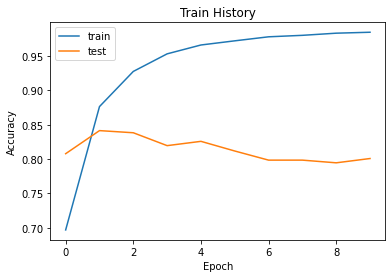

In [ ]:
show_train_history('accuracy','val_accuracy')



#underfitting
#overfitting

In [ ]:
from collections import Counter
segments=[]
segments_postive=[]
segments_negative=[]

#全部訓練資料分詞
for content in train:
    _sentence=list(jieba.cut(content, cut_all=True))
    segments+=_sentence

#去除訓練、正面與負面評論的停用詞
remainderWords = list(filter(lambda a: a not in stopWords, segments))

In [ ]:
sorted(Counter(remainderWords).items(), key=lambda x:x[1], reverse=True)

[('送', 2319),
 (',', 1911),
 ('點', 1533),
 ('沒', 1369),
 ('餐', 1305),
 ('時', 1226),
 ('好吃', 1070),
 ('吃', 1055),
 ('錯', 1007),
 ('味道', 949),
 ('餅', 677),
 ('快', 655),
 ('飯', 579),
 ('肉', 550),
 ('太', 541),
 ('說', 534),
 ('速度', 486),
 ('菜', 438),
 ('裡', 421),
 ('送到', 412),
 ('非常', 400),
 ('話', 395),
 ('訂', 391),
 ('單', 387),
 ('卷', 386),
 ('兩', 371),
 ('賣', 364),
 ('差', 359),
 ('電', 358),
 ('員', 356),
 ('很快', 346),
 ('慢', 337),
 ('難', 332),
 ('超', 328),
 ('.', 325),
 ('涼', 323),
 ('服', 314),
 ('度', 302),
 ('會', 301),
 ('態', 300),
 ('務', 294),
 ('粥', 292),
 ('評', 292),
 ('贊', 288),
 ('雞', 288),
 ('間', 288),
 ('包', 283),
 ('不好', 278),
 ('謝', 272),
 ('量', 267),
 ('什', 264),
 ('特', 263),
 ('外', 260),
 ('裝', 253),
 ('太慢', 249),
 ('少', 247),
 ('配送', 241),
 ('實', 238),
 ('感', 224),
 ('樣', 221),
 ('百度', 220),
 ('小哥', 217),
 ('鐘', 216),
 ('半', 215),
 ('覺', 211),
 ('一次', 208),
 ('絲', 207),
 ('分', 201),
 ('面', 198),
 ('遞', 194),
 ('挺', 193),
 ('醬', 191),
 ('辛苦', 185),
 ('熱', 182),
 ('～', 181),
 ('

In [ ]:
model = Sequential()

model.add(Embedding(output_dim=128, input_dim=3000, input_length=50))
model.add(tf.keras.layers.LSTM(units=64, activation='sigmoid', recurrent_activation='hard_sigmoid'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(units=256, activation='relu' ))
model.add(Dropout(0.2))

model.add(Dense(units=2, activation='sigmoid' ))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 128)           384000    
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 flatten_1 (Flatten)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 256)               16640     
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 2)                

In [ ]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
train_history =model.fit(x_train, 
                         labels_train,
                         batch_size=100, 
                         epochs=10,
                         verbose=2,
                         validation_split=0.2)

Epoch 1/10
52/52 - 8s - loss: 0.6963 - accuracy: 0.4949 - val_loss: 0.6842 - val_accuracy: 0.7094 - 8s/epoch - 160ms/step
Epoch 2/10
52/52 - 6s - loss: 0.6043 - accuracy: 0.6926 - val_loss: 0.4986 - val_accuracy: 0.7648 - 6s/epoch - 115ms/step
Epoch 3/10
52/52 - 5s - loss: 0.3970 - accuracy: 0.8316 - val_loss: 0.4714 - val_accuracy: 0.7945 - 5s/epoch - 105ms/step
Epoch 4/10
52/52 - 7s - loss: 0.3109 - accuracy: 0.8785 - val_loss: 0.4356 - val_accuracy: 0.8031 - 7s/epoch - 125ms/step
Epoch 5/10
52/52 - 5s - loss: 0.2527 - accuracy: 0.9043 - val_loss: 0.4355 - val_accuracy: 0.8172 - 5s/epoch - 104ms/step
Epoch 6/10
52/52 - 5s - loss: 0.2250 - accuracy: 0.9164 - val_loss: 0.4789 - val_accuracy: 0.8016 - 5s/epoch - 104ms/step
Epoch 7/10
52/52 - 5s - loss: 0.2048 - accuracy: 0.9219 - val_loss: 0.4845 - val_accuracy: 0.8117 - 5s/epoch - 104ms/step
Epoch 8/10
52/52 - 5s - loss: 0.1806 - accuracy: 0.9338 - val_loss: 0.4901 - val_accuracy: 0.8234 - 5s/epoch - 105ms/step
Epoch 9/10
52/52 - 5s - 

In [ ]:
scores = model.evaluate(x_test, labels_test, verbose=1)
scores[1]

50/50 [==============================] - 1s 13ms/step - loss: 0.5247 - accuracy: 0.8238


0.8237500190734863

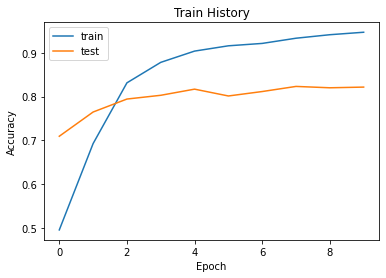

In [ ]:
show_train_history('accuracy','val_accuracy')